# 08 Multiple Linear Regression & Polynomial Regression

Ada dua model regression yaitu "Multiple Linear Regression" dan "Polynomial Regression".

Keduaanya merupakan pengembangan dari "Simple Linear Regression" yang pernah kita pelajari pada sesi sebelumnya.

## Sample Dataset

Dataset yang akan  digunakan dalam sesi pembelajaran kali ini. akan memanfaatkan dataset "pizza", dan juga akan menyertakan kolom baru yaitu "jumlah topping" atau "n topping" dan "diameter" lalu "harga".

In [2]:
import pandas as pd

pizza = {'diameter': [4, 6, 8, 10, 12], 
         'n_topping': [2, 1, 0, 2, 3],
         'harga': [7, 9, 13, 17.5, 18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,4,2,7.0
1,6,1,9.0
2,8,0,13.0
3,10,2,17.5
4,12,3,18.0


- Mengimport modul pandas "import pandas as pd" karena akan membentuk dataset dalam format pandas DataFrame.
- Lalu berikutnya, siapkan dataset. Dataset kali ini dibentuk dari suatu dictionary, yang terdiri dari tiga buah key yaitu "diameter", "n_toping", dan "harga".
- Setiap key tersebut akan menampung list yang berisi sekumpulan bilangan yang berasosiasi dengan setiap keys tersebut.
- Lalu selanjutnya dictionary tersebut akan ditampung ke dalam variabe "pizza".
- Untuk selanjutnya, dictionary ini akan digunakan sebagai base atau sebagai basis untuk membuat pandas DataFrame.
- Lalu selanjutnya dipanggil "pd.DataFrame(pizza)", artinya disini akan membentuk suatu pandas DataFrame dari data-data yang tersimpan dalam variabel pizza tersebut.
- Selanjutnnya DataFrame yang terbentuk ini akan ditampung kedalam variabel "train_pizza_df".
- Lalu terakhir, akan mencoba tampilkan ke layar.


## Sample dataset 2

In [3]:
pizza = {'diameter': [8, 9, 11, 16, 12], 
         'n_topping': [2, 0, 2, 2, 0],
         'harga': [11, 8.5, 15, 18, 11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


dari Dataset diatas sama-sama terdiri dari tiga buah kolom yaitu kolom "diameter", "n_topping", dan "harga". kali ini kita akan membentuk suatu model machine learning sederhana yang dapat digunakan untuk memprediksi harga pizza berdasarkan ukuran diameter dan jumlah toppingnya. Dengan kata lain, disini data diameter dan jumlah topping atau "n_topping" akan berperan sebagai features, sedangkan harga pizza atau "harga" akan berperan sebagai target. Karena disini akan diprediksi berupa nilai continous dan bukan kategori, maka kasus tersebut masuk kedalam "Regression Task".


## Preprocessing Dataset
Pengelompokan untuk sekumpulan nilai features dan nilai target dari sekumpulan dataset yang dimiliki

In [4]:
import numpy as np

X_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 4  2]
 [ 6  1]
 [ 8  0]
 [10  2]
 [12  3]]

y_train: [ 7.   9.  13.  17.5 18. ]


-  import "numpy as np" untuk menentukan nilai dataset.
-  kasus kali ini, akan melakukan konversi ke dalam numpy array yaitu nilai "diamter" dan "jumlah topping".
- Lalu kemudian ditampung kedalam variabel "X_train" sebagai kumpulan features untuk training set.
- Lalu untuk harga pizza, juga akan mengkonversikan menjadi numpy array untuk selanjutnya ditampung kedalam variabel "y_train" sebagai kumpulan nilai target untuk training set.
- Proses serupa juga akan diterapkan pada testing setnya.

Jika kita melihat outputnya, "X_train" selalu berada dalam format array 2 dimensi, sedangkan "y_train" akan selalu berada dalam format array 1 dimensi.

In [5]:
X_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]


Pada hasil output diatas tersebut merupakan testing set yang kita miliki baik untuk features maupun targetnya.

## Multiple Linear Regression 

Multiple Linear Regression merupakan generalisasi dari Simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanatory variables.

$y = \alpha + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n$



- Jika diperhatikan pada formula atau rumus tersebut, disana terdapat lebih dari satu nilai x, yaitu ada x1, x2, sampai dengan xn.
- Dengan kata lain, jumlah x atau jumlah features ini bisa lebih dari satu.
- Yang perlu diperhatikan disini ialah untuk setiap nilai $x$ nya akan dikalikan dengan $\beta$.
- Berarti jika memiliki $x1$, maka $x1$ nilai tersebut akan dikalikan dengan $\beta1$.
- Dan jika memiliki $x2$, maka nilai $x2$ nilai tersebut akan dikalikan dengan $\beta2$



Referensi: [https://en.wikipedia.org/wiki/Linear_regression](https://en.wikipedia.org/wiki/Linear_regression)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: -1.8993494770679265


- Pertama-tama lakukan import modul "from sklearn.linear_model import LinearRegression".
- Selanjutnya, lakukan import juga untuk matrix nya dengan memanggil fungsi "from sklearn.metrics import r2_score".
- Membentuk objek modelnya dengan memanggil fungsi "LinearRegression()", lalu ditampung kedalam variabel "model".
- Lalu berikutnya, akan melakukan proses training model dengan memanggil fungsi "model.fit" dengan menyertakan parameter "(X_train, y_train)".
- Setelah modelnya ditraining, model tersebut akan digunakan untuk melakukan prediksi. dan gunakan train model untuk melakukan prediksi terhadap feature yang terdapat dalam testing set kita. Oleh karenanya, Panggil fungsi "y_pred = model.predict(X_test)" yang akan ditampung kedalam variabel "y_pred".
- Untuk selanjutnya model prediksi ini akan kita gunakan untuk mengukur peforma dari model itu sendiri.
- Dalam kasus kali ini digunakan r2_score sebagai pengukuran peformanya.
- Tampilkan nilai tersebut.

Pada SkLearn sebenarnya tidak ada perbedaan antara implementasi "Simple Linear Regression" dan "Multiple Linear Regression". Yang berbeda hanyalah pada jumlah feature yang dilewatkannya.

## Polynomial Regression

Polynomial Regression memodelkan hubungan antara independent variable $x$ dan dependent variable $y$ sebagai derajat polynomial dalam $x$.

- Independent variable $x$ sebenarnya merupakan features.
- Dependent variable $x$ sebenarnya merupakan target.


Referensi: [https://en.wikipedia.org/wiki/Polynomial_regression](https://en.wikipedia.org/wiki/Polynomial_regression)

### Preprocessing Dataset
Memangkas jumlah feature nya menjadi satu feature saja.

In [8]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 4]
 [ 6]
 [ 8]
 [10]
 [12]]

y_train: [ 7.   9.  13.  17.5 18. ]


- Feturesnya dipangkas menjadi satu feature yang dalam kasus ini yang dijadikan feature adalah "diameter" atau diameter pizzanya.
- bentuk numpy array "(train_pizza_df['diameter'])" karena hanya ingin mengambil kolom diameter saja.
- Lalu lakukan proses reshaping atau reshape yang dalam kasus ini (-1, 1) karena pada SkLearn untuk featuresnya itu harus berada dalam array 2 dimensi, sedangkan disini kita hanya memiliki satu kolom saja sebagai featuresnya.
- Aritinya fetures yang terdiri dari satu varibel tersebut, perlu kita transformasikan kedalam array dua dimensi dengan memanfaatkan method reshape (-1, 1) lalu kita tampung kedalam variabel "X_train".
- Selanjutnya bentuk array yang kedua yang dimasukan nilai target dengan memanggil "np.array(train_pizza_df['harga'])" karena kolom harga tersebut akan digunakan sebagai target prediksinya yang akan kita tampung kedalam variabel "y_train".
- Print nilai 'X_train" dan juga "y_train" nya.

Walaupun nilai "X_train" nya terdiri dari satu features saja, tetapi array yang terbentuk ini tetap dalam format array 2 dimensi. Hal ini dimungkinkan karena kita memanggil method "reshape(-1, 1)".

### Polynomial Regression: Quadratic

 Pada SkLearn dengan derajat polynomial 2 atau biasa dikenal dengan istilah "Quadratic". Selain derajat polynomial 2, juga bisa menggunakan polynomial lainnya seperti 3, 4, dan seterusnya. Hanya saja, yang paling umum ditemui adalah derajat polynomial 2 dengan 3 atau dikenal dengan "Quadratic" dan "Cubic".


$y = \alpha + \beta_1x + \beta_2x^2$


- nilai feature yaitu x.
- nilai feature yang tunggal tersebut akan direpresentasikan dalam format polynomial.
- Untuk kasus kali ini, akan menggunakan polynomial derajat 2 yang berarti akan memiliki $x^1$ dan $x^2$.
- Untuk $x^1$ akan dikalikan dengan $\beta^1$ dan untuk $x^2$ akan dikalikan dengan $\beta^2$.


#### Polynomial Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   4.  16.]
 [  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  12. 144.]]



- import "from sklearn.preprocessing import PolynomialFeatures".
- Bentuk objek polynomial features dengan memanggil "PolynomialFeatures" dengan menyertakan parameter "(degree=2)" atau derjat polynomialnya yang dalam kasus ini nilainya adalah 2. Karena dalam kasus kita kali ini kita akan membentuk "Quadratic Polynomial Regression", maka degree nya kita beri nilai 2 lalu kita tampung kedalam variabel "quadratic_feature".
- Objek tersebut akan kita gunakan untuk melakukan proses transformasi terhadap dataset feature yang kita miliki. Oleh karena itu, kita memanggil "quadratic_feature.fit_transform" dengan menyertakan parameter "X_train". Lalu hasil transformasinya, akan kita tampung ke dalam variabel "X_train_quadratic".
- Variabel "X_train_quadratic" akan berisi features dari training set kita yang sudah ditransformasikan kedalam "Polynomial Features".
- Langkah akhir, kita akan coba untuk tampilkan hasilnya.

Outputnya nilai feature yang tunggal menjadi 3. nilai pada indeks pertama adalah 6, Nilai 1 diperoleh dari nilai x dipangkatkan 0 yang kita ketahui hasilnya adalah 1, nilai 2 diperoleh dari 6 dipangkatkan 1 adalah 6, lalu 6 dipangkatkan 2 adalah 36 dan seterusnya.

#### Training Model

In [10]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

- Import "LinearRegression()" yang kita tampung kedalam variabel model.
- Training object dengan memanfaatkan nilai fetures yang sudah ditransformasikan kedalam polynomial dengan memanggil "(X_train_quadratic, y_train)".
- Yang berbeda hanyalah pada polynomial regression yang perlu melakukan transformasi features kedalam polynomial features sebelum mealkukan proses training model.


#### Visualisasi Model

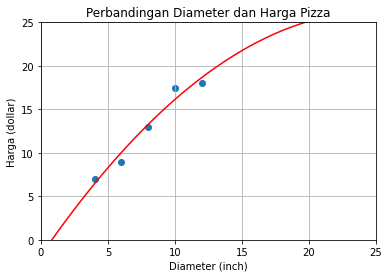

In [11]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

- Import mathplotlibnya karena ingin divisualiasikan.
- Bentuk terlebih dahulu sederet bilangan mulai dari 0 sampai 25 sebanyak 100 data point yang akan ditampung kedalam variabel "X_vis".
- Lalu variable "X_vis" ini akan dikenakan proses transformasi dengan memanggil "quadratic_feature.transform(X_vis)". melakukan transform yang akan digunakan quadratic_feature yang sudah dibuat sebelumnya, lalu hasilnya kita tampung kedalam "X_vis_quadratic".
- Lakukan nilai prediksi terhadap nilai "X_vis_quadratic" dengan memanggil "model.predict(X_vis_quadratic)" yang hasilnya ditampung kedalam variabel "y_vis_quadratic".
- hasil visualisasi ada 2 hal. Yang pertama adalah X_train dan y_train nya atau data point yang digunakan untuk melakukan proses trainingnya.
- Untuk data training tersebut, divisualisasikan sebagai scatter plot dengan memanggil "plt.scatter" dengan menyertakan parameternya yaitu X_train serta y_train nya yang akan menghasilkan 5 titik dan kelima titik tersebut merepresentasikan 5 data point pada training set.
- Memploting hasil prediksi dari model kita dengan memanggil "plt.plot(X_vis, y_vis_quadratic, '-r')". memploting sebagai line plot atau ploting garis dengan warna merah.
- Lalu cetak keterangan tambahan seperti judul, xlabel dan ylabel, xlim dan ylim, grid untuk menampilkan garisnya yang diberi nilai True, lalu kita show atau tampilkan pada layar.


### Polynomial Regression: Quadratic vs Cubic

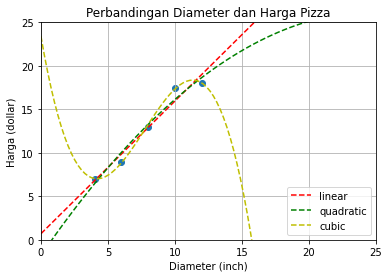

In [12]:
# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_featuriser = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Training Set :

- panggil "plt.scatter(X_train, y_train)" untuk plotting dataset yang hasil plottingnya berupa kelima data point atau kelima titik biru.

Linear :
- akan membentuk model simple linear regression.
- bentuk objek modelnya dengan memanggil "LinearRegression()" yang sudah ditampung kedalam variabel "model".
- Lalu modelnya ditraining dengan menggunakan "X_train" dan "y_train".
- Berikutnya disini lakukan penyiapan 100 data point dengan jangkauan 0 - 25. Lalu nilai dat point ini sebelum ditampung kedalam variabel "X_vis" akan dilakukan reshape dengan parameter (-1, 1).
- Selanjutnya nilai yang ditampung dalam variabel "X_vis" tersebut akan digunakan sebagai features untuk melakukan prediksi dengan memanggil "model.predict(X_vis)" yang ditampung kedalam variabel "y_vis".
- Lalu berikutnya, hasil prediksi tersebut akan ditampilkan secara visual dengan memanggil "plt.plot(X_vis, y_vis, '--r', label='linear')" yang akan menghasilkan garis merah putus-putus.
- Garis merah tersebut merepresentasikan model simple linear regression yang terbentuk.

Quadratic :
- Lalu berikutnya dibandingkan dengan quadratic. Perbedaannya sebenarnya terletak hanya pada penerapan point polynomial feature dengan degree atau derajat 2.
- bentuk objeknya dengan memanggil "PolynomialFeatures(degree=2)" yang akan ditampug kedalam variabel "quadratic_feature".
- Selanjutnya kita akan menggunaka objek "qudratic_feature" tersebut, untuk melakukan fit.transform terhadap nilai dari "X_train" yang hasilnya akan ditampung kedalam variabel "X_train_quadratic".
- Lalu bentuk objek modelnya yang ditampung kedalam variabel "model".
- Proses training terhadap model. Hanya saja disini, modelnya akan kita training dengan menggunakan features yang sudah ditranformasikan kedalam quadratic polynomial. Oleh karenanya, panggil "(X_train_quadratic, y_train)".
- Berikutnya nilai "X_vis" nya juga sama, akan ditransformasikan menjadi quadratic polynomial yang selanjutnya akan tampung kedalam variabel "X_vis_quadratic".
- Lalu nilai "X_vis_quadratic tersebut akan digunakan untuk mealkukan prediksi.
- Selanjutnya hasil prediksi tersebut akan diplotting dengan memanggil "plt.plot(X_vis, y_vis, '--g', label='quadratic')".

Cubic :

- Perbedaan cubic dengan yang lain yaitu sewaktu membentuk objek polynomial features, serta menyertakan degree nya adalah 3.
- Lalu untuk proses berikutnya sama persis dengan proses linear dan quadratic.
- Untuk cubic polynomial regression disini, akan dibentuk plotting sebagai "--y" artinya akan diploting sebagai garis putus-putus berwarna yellow atau kuning lalu kita menyertakan label "cubic".
